In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
   
    #from sklearn import naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
#     %matplotlib inline

df = pd.read_csv('FinalListPreprocessedDataNew.csv')

df = df.dropna()
X=df['STEMMING WORDS']
y=df['LABEL']

print(X)

print(y)

y.value_counts()

df.shape

df.head()

0       ශ්රී ලංකා හා දකුණු අප්රිකාව අතර අද පැවැත්වී නි...
1                 අද තරඟ ක්රීඩා කරන කන්ඩායම දෙක චන්දි ඉන්
2       ක්රීඩාවෙන් ජාත්යන්තර ජයගත් ඔබේ කතාව අනාගත පරම්...
3            ඒසේනම් ප්රිය ක්රීඩා ලෝලී හිතවතුනි අද තමා දවස
4       වත්මන ශ්රී ලංකා කණ්ඩායමට ලොකු ගමනක යා හැකි බව ...
                              ...                        
2007    මේ රටේ අසරන මිනිස්සුන් ඇස් වලින් වැටෙන කදුලක් ...
2008      ගිය ආණ්ඩුව කාලයේ වරුන් උසාවි ගානේ බේරෙව්වේ මෙයා
2009    තියෙනවා අප්පච්චි ගාව අස් වුණොත් උසාවි ගානේ රස්...
2010    අඟහරුවාදා කොළඹට ලක්ෂයක එන්නේ මොකාටද යන්නේ කොහේ...
2011    දැන් මහින්ද අප්පච්චි ගාව තියෙන ඔහුගේ සේරම එළිය...
Name: STEMMING WORDS, Length: 2002, dtype: object
0       Sport
1       Sport
2       Sport
3       Sport
4       Sport
        ...  
2007    Other
2008    Other
2009    Other
2010    Other
2011    Other
Name: LABEL, Length: 2002, dtype: object


,Unnamed: 0,User,CREATED_AT,LABEL,STEMMING WORDS,LIKE COUNT,FOLLOWERS COUNT,RETWEET COUNT
0,1.0,1.436330e+18,9/10/2021 13:53,Sport,ශ්රී ලංකා හා දකුණු අප්රිකාව අතර අද පැවැත්වී නි...,0,116,0
1,2.0,1.436320e+18,9/10/2021 13:09,Sport,අද තරඟ ක්රීඩා කරන කන්ඩායම දෙක චන්දි ඉන්,3,1344,0
2,3.0,1.436180e+18,9/10/2021 4:11,Sport,ක්රීඩාවෙන් ජාත්යන්තර ජයගත් ඔබේ කතාව අනාගත පරම්...,0,373,0
3,4.0,1.436140e+18,9/10/2021 1:30,Sport,ඒසේනම් ප්රිය ක්රීඩා ලෝලී හිතවතුනි අද තමා දවස,5,88,0
4,5.0,1.436040e+18,9/9/2021 18:43,Sport,වත්මන ශ්රී ලංකා කණ්ඩායමට ලොකු ගමනක යා හැකි බව ...,7,7425,0


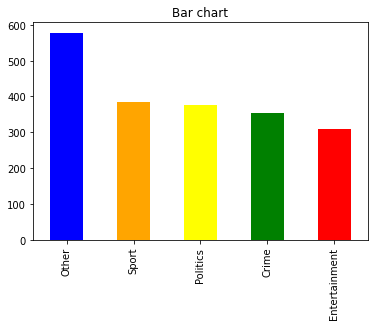

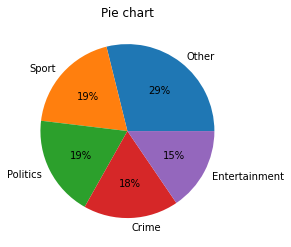

In [2]:
count_Class=pd.value_counts(df["LABEL"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange","yellow","Green","Red"])
plt.title('Bar chart')
plt.show()

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [3]:
csvfile = open('FinalListPreprocessedDataNew.csv', encoding="utf-8")
lines= len(csvfile.readlines())
print(lines)
df['LABEL'].value_counts()

2013


Other            578
Sport            385
Politics         375
Crime            354
Entertainment    310
Name: LABEL, dtype: int64

# SVM

In [4]:
from sklearn.model_selection import train_test_split

X = df['STEMMING WORDS'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('clf', LinearSVC()),
])
#
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

print(metrics.classification_report(y_test,predictions))



[[ 82   2  18   9   3]
 [  4  61  27   4   8]
 [ 11  17 117  37   8]
 [  2   2  21  88   2]
 [ 10   6  23   9  90]]
               precision    recall  f1-score   support

        Crime       0.75      0.72      0.74       114
Entertainment       0.69      0.59      0.64       104
        Other       0.57      0.62      0.59       190
     Politics       0.60      0.77      0.67       115
        Sport       0.81      0.65      0.72       138

     accuracy                           0.66       661
    macro avg       0.68      0.67      0.67       661
 weighted avg       0.68      0.66      0.66       661



# Logestic Regression

In [5]:
from sklearn.model_selection import train_test_split

X = df['STEMMING WORDS'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

logistic_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('model', LogisticRegression()),
])
#
# Feed the training data through the pipeline
logistic_text_clf.fit(X_train, y_train)

logistic_predictions = logistic_text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,logistic_predictions))

print(metrics.classification_report(y_test,logistic_predictions))



[[ 75   0  30   8   1]
 [  1  41  55   1   6]
 [  9   9 137  29   6]
 [  2   0  28  84   1]
 [  6   4  32  10  86]]
               precision    recall  f1-score   support

        Crime       0.81      0.66      0.72       114
Entertainment       0.76      0.39      0.52       104
        Other       0.49      0.72      0.58       190
     Politics       0.64      0.73      0.68       115
        Sport       0.86      0.62      0.72       138

     accuracy                           0.64       661
    macro avg       0.71      0.63      0.65       661
 weighted avg       0.69      0.64      0.64       661



# Naive Bayes

In [6]:
from sklearn.model_selection import train_test_split

X = df['STEMMING WORDS'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

NB_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,2))),
                     ('mnb', MultinomialNB()),
])
#
# Feed the training data through the pipeline
NB_text_clf.fit(X_train, y_train)

NB_predictions = NB_text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,NB_predictions))

print(metrics.classification_report(y_test,NB_predictions))



[[ 61   0  49   3   1]
 [  0   3  96   1   4]
 [  3   0 180   5   2]
 [  0   0  61  53   1]
 [  3   0  54   5  76]]
               precision    recall  f1-score   support

        Crime       0.91      0.54      0.67       114
Entertainment       1.00      0.03      0.06       104
        Other       0.41      0.95      0.57       190
     Politics       0.79      0.46      0.58       115
        Sport       0.90      0.55      0.68       138

     accuracy                           0.56       661
    macro avg       0.80      0.50      0.51       661
 weighted avg       0.76      0.56      0.53       661



# KNN

In [7]:
from sklearn.model_selection import train_test_split

X = df['STEMMING WORDS'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

KNN_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,3))),
                     ('neigh', KNeighborsClassifier(n_neighbors=3)),
])
#
# Feed the training data through the pipeline
KNN_text_clf.fit(X_train, y_train)
KNN_predictions = KNN_text_clf.predict(X_test)

from sklearn import metrics

print(metrics.confusion_matrix(y_test,KNN_predictions))
print(metrics.classification_report(y_test,KNN_predictions))


[[ 13  99   1   1   0]
 [  0 104   0   0   0]
 [  0 176  13   1   0]
 [  0 109   0   6   0]
 [  0 133   0   0   5]]
               precision    recall  f1-score   support

        Crime       1.00      0.11      0.20       114
Entertainment       0.17      1.00      0.29       104
        Other       0.93      0.07      0.13       190
     Politics       0.75      0.05      0.10       115
        Sport       1.00      0.04      0.07       138

     accuracy                           0.21       661
    macro avg       0.77      0.25      0.16       661
 weighted avg       0.80      0.21      0.15       661



# SGD

In [8]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['STEMMING WORDS'] 
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape


sdg = SGDClassifier(max_iter=1000, tol=1e-3)
sdg.fit(X_train_tfidf,y_train)

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

SDG_text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', max_features = 10000, ngram_range=(1,3))),
                     ('sdg', SGDClassifier(max_iter=1000, tol=1e-3)),
])
#
# Feed the training data through the pipeline
SDG_text_clf.fit(X_train, y_train)
SDG_predictions = SDG_text_clf.predict(X_test)

from sklearn import metrics

print(metrics.confusion_matrix(y_test,SDG_predictions))
print(metrics.classification_report(y_test,SDG_predictions))


[[ 81   2  19   9   3]
 [  4  53  29   5  13]
 [ 13  21 109  35  12]
 [  2   3  18  89   3]
 [  9  11  16   7  95]]
               precision    recall  f1-score   support

        Crime       0.74      0.71      0.73       114
Entertainment       0.59      0.51      0.55       104
        Other       0.57      0.57      0.57       190
     Politics       0.61      0.77      0.68       115
        Sport       0.75      0.69      0.72       138

     accuracy                           0.65       661
    macro avg       0.65      0.65      0.65       661
 weighted avg       0.65      0.65      0.65       661



In [9]:
predi = KNN_text_clf.predict(["ඔලිම්පික් ක්‍රීඩාවේ නිරත වන්නන් ටෝකියෝ බලා පිටත් වේ"])
print(predi)
predi = KNN_text_clf.predict(["ගුරු වැටුප් විෂමතා වලට විසඳුම් ලැබේ"])
print(predi)
predi = KNN_text_clf.predict([" ටෝකියෝ අත්අඩංගුවට පත්වේ"])
print(predi)

['Entertainment']
['Entertainment']
['Entertainment']
